# Plotando Gráficos

In [2]:
from matplotlib import pyplot as plt 
import math

year = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14954.3]

plt.plot(year, gdp, color='green', marker='o', linestyle='solid')
plt.title("GDP Nominal")

plt.ylabel("Bilhões de $")
plt.show()

<Figure size 640x480 with 1 Axes>

Text(0,0.5,'Bilhões de $')

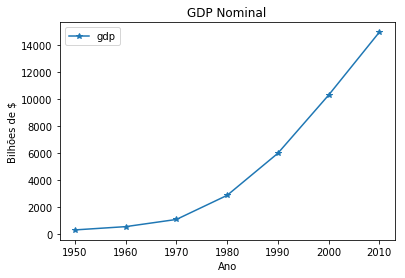

In [3]:
import pandas as pd

df = pd.DataFrame({'year': [1950, 1960, 1970, 1980, 1990, 2000, 2010], 
                   'gdp': [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14954.3] })
df.plot('year', 'gdp', marker='*')
plt.title('GDP Nominal')
plt.xlabel('Ano')
plt.ylabel('Bilhões de $')


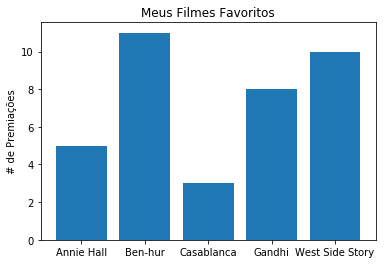

In [4]:
movies = ['Annie Hall', 'Ben-hur', 'Casablanca', 'Gandhi', 'West Side Story']
num_oscars = [5,11,3,8,10]

xs = range(0,len(movies))
plt.bar(xs, num_oscars)

plt.ylabel('# de Premiações')
plt.title("Meus Filmes Favoritos")
plt.xticks(xs,movies)
plt.show()

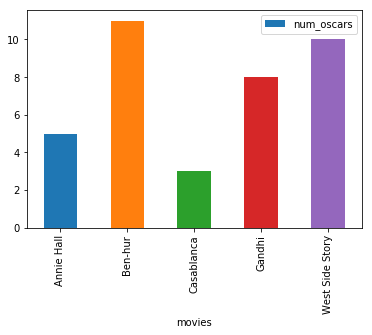

In [5]:
df = pd.DataFrame({'movies':['Annie Hall', 'Ben-hur', 'Casablanca', 'Gandhi', 'West Side Story'],
                'num_oscars':[5,11,3,8,10]})
df.plot('movies', 'num_oscars', kind='bar')

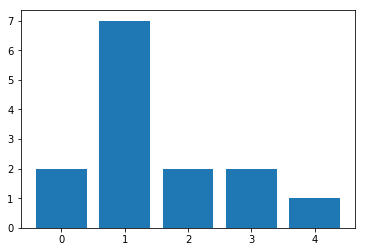

In [6]:
from collections import Counter
data = [1,1,1,1,3,4,1,2,1,1,2,3,0,0]
contagem = Counter(data)
xs = sorted(set(data))
ys = [contagem[i] for i in xs]
plt.bar(xs,ys)
#plt.axis([0,101,0,25])
plt.show()

In [7]:
16 / 2

8.0

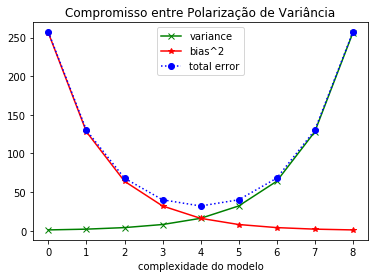

In [8]:
variance = [1,2,4,8,16,32,64,128,256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x+y for x,y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

plt.plot(xs,variance, 'g-x', label='variance')
plt.plot(xs, bias_squared, 'r-*', label='bias^2')
plt.plot(xs, total_error, 'b:o', label='total error')

plt.legend(loc=9)
plt.xlabel('complexidade do modelo')
plt.title('Compromisso entre Polarização de Variância')
plt.show()

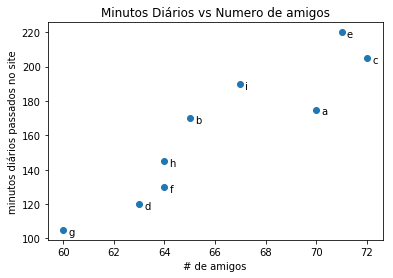

In [9]:
# Gráfico de dispersão
friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220,130,105,145,190]
labels = ['a','b','c','d','e','f','g','h','i']

plt.scatter(friends, minutes)

for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label, xy=(friend_count, minute_count), xytext=(5,-5), textcoords='offset points')
    
plt.title("Minutos Diários vs Numero de amigos")    
plt.xlabel('# de amigos')
plt.ylabel("minutos diários passados no site")
plt.show()

# Estatística -- Básico

In [10]:
def dot(v,w):
    return sum(v_i*w_i for v_i, w_i in zip(v,w))

def sum_of_squares(x):
    return dot(x,x)

def mean(x):
    return sum(x)/len(x)

def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint -1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi])/2

def quantile(x,p):
    p_index = int(p*len(x))
    return sorted(x)[p_index]

def mode(x):
    counts = Counter(x)    
    print(counts.items())
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]
    
def variance(x):
    n=len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)

def standard_deviation(x):
    return math.sqrt(variance(x))



def covariance(x,y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y) / stdev_x /stdev_y
    else: return 0

x = [1,2,9,7, 0, 8, 11, 8 , 9, 14]
print(median(x))
print(quantile(x, 0.9))
print(mode(x))

8.0
14
dict_items([(1, 1), (2, 1), (9, 2), (7, 1), (0, 1), (8, 2), (11, 1), (14, 1)])
[9, 8]


[0.85229146]


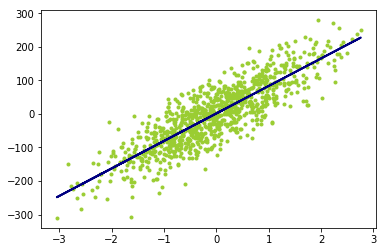

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, coef=True, noise=50, random_state=0)

plt.scatter(X, y, color='yellowgreen', marker='.')
print(correlation(X,y))

lr = linear_model.LinearRegression()
lr.fit(X, y)

plt.plot(X, lr.predict(X), color='navy', linewidth=2, label='Linear regressor')

# Teste de hipótese

In [12]:
from scipy.stats import norm

def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x-mu) / math.sqrt(2) / sigma)) / 2

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)    
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    while hi_z - low_z > tolerance:        
        mid_z = (low_z + hi_z)/2        
        mid_p = (normal_cdf(mid_z))
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z


def normal_approximation_to_binomial(n,p):
    mu = p*n
    sigma = math.sqrt(p*(1-p)*n)
    return mu, sigma

def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi,mu,sigma) - normal_cdf(lo,mu,sigma)

def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)

def normal_upper_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)
    
def normal_lower_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)


def normal_two_sided_bounds(probability, mu=0, sigma=1):
    """returns the symmetric (about the mean) bounds 
    that contain the specified probability"""
    tail_probability = (1 - probability) / 2

    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)

    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound

lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
print("lo", lo)
print("hi", hi)
    
normal_probability_below = normal_cdf

def normal_probability_above(lo,mu=0,sigma=1):
    return 1-normal_cdf(lo,mu,sigma)

def two_sided_p_value(x,mu=0, sigma=1):
    if x >= mu:
        return 2 * normal_probability_above(x,mu,sigma)
    else:
        return 2 * normal_probability_below(x,mu,sigma)

print(two_sided_p_value(529.5, mu_0, sigma_0))    

mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
print(mu_0, sigma_0)

print(two_sided_p_value(529.5, mu_0, sigma_0))
print(two_sided_p_value(550, mu_0, sigma_0))

NameError: name 'mu_0' is not defined

# Regressão Linear

Criamos uma hipótese de que há constantes $\alpha$ e $\beta$ tais que:
$$
y_i = \beta x_i + \alpha + \epsilon_i
$$

In [13]:
def predict(alpha, beta, x_i):
    return beta*x_i + alpha

def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

def sum_of_squared_error(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i)**2 for x_i, y_i in zip(x,y))

def least_squares_fit(x,y):
    beta = correlation(x,y) * standard_deviation(y)/standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

def total_sum_of_squares(y):
    return sum(v**2 for v in de_mean(y))

def r_squared(alpha, beta, x, y):
    return 1.0 - (sum_of_squared_error(alpha,beta,x,y)/total_sum_of_squares(y))

[0.99259336]
[0.25877584] [82.1313384]


NameError: name 'minimize_stochastic' is not defined

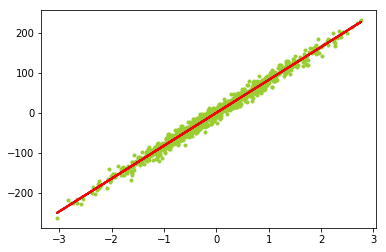

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, coef=True, noise=10, random_state=0)

plt.scatter(X, y, color='yellowgreen', marker='.')
print(correlation(X,y))

lr = linear_model.LinearRegression()
lr.fit(X, y)

b1, b2 = least_squares_fit(X,y)
print(b1, b2)

plt.plot(X, lr.predict(X), color='navy', linewidth=2, label='Linear regressor')
plt.plot(X, [predict(b1,b2,x_i) for x_i in X], color='red', linewidth=2, label='Linear regressor')

b1, b2 = minimize_stochastic(squared_error, squared_error_gradient, X, y, theta, 0.00001)
plt.plot(X, [predict(b1,b2,x_i) for x_i in X], color='blue', linewidth=2, label='Linear regressor')

print(r_squared(b1,b2,X,y))

In [15]:
import random 

def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]  # create a list of indexes
    random.shuffle(indexes)                    # shuffle them
    for i in indexes:                          # return the data in that order
        yield data[i]

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i),       # alpha partial derivative
            -2 * error(alpha, beta, x_i, y_i) * x_i] # beta partial derivative

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):

    data = [(x_,y_) for x_,y_ in zip(x,y)]
    theta = theta_0                             # initial guess
    alpha = alpha_0                             # initial step size
    min_theta, min_value = None, float("inf")   # the minimum so far
    iterations_with_no_improvement = 0
    
    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:        
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )                
        
        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points                
        for x_i, y_i in in_random_order(data):               
            gradient_i = gradient_fn(x_i, y_i, theta)            
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
            
    return min_theta

X_ = [x[0] for x in X]
y_ = [y_ for y_ in y]


  
random.seed(0)
theta = [random.random(), random.random()]
print('err')
value = sum([squared_error(x_i, y_i, theta) for x_i, y_i in zip(X,y)])
print( value )

alpha, beta = minimize_stochastic(squared_error, squared_error_gradient, X, y, theta, alpha_0=0.0001)
print(alpha, beta)

err
[6567678.00143369]
[0.25832697] [82.13178512]


# ANOVA

In [16]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pandas

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

df = pd.read_csv('run.txt',sep='\t')
df.head()

,Year,Men200m
0,1900,22.2
1,1904,21.6
2,1908,22.6
3,1912,21.7
4,1920,22.0


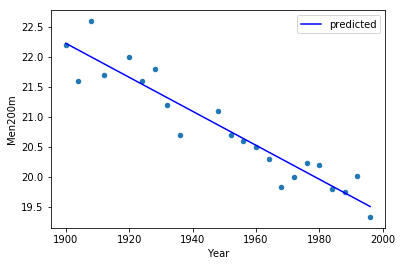

In [17]:
b1, b2 = least_squares_fit(df['Year'],df['Men200m'])
df['predicted'] = predict(b1, b2, df.Year)
ax = df.plot.scatter(x='Year', y='Men200m')
df.plot.line(x='Year', y='predicted', style='b', ax=ax)

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

cw_lm=ols('Year ~ Men200m', data=df).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

               sum_sq    df           F        PR(>F)
Men200m   17624.58452   1.0  177.719542  2.073783e-11
Residual   1983.41548  20.0         NaN           NaN


In [19]:
SQT = sum((df['Men200m'] - df['Men200m'].mean())**2)
SQE = sum((df['Men200m'] - df['predicted'])**2)
SQReg = sum((df['predicted'] - df['Men200m'].mean())**2)

In [20]:
b1, b2 = least_squares_fit(df['Year'],df['Men200m'])

In [21]:
SQT,SQE, SQReg

(17.574131818181822, 1.7776828381736587, 15.796448980008174)

In [22]:
SQReg/(SQE/(20))

177.71954187550128

# Regressão Múltipla

$$
y_i = \alpha + \beta_1 x_{i1} + ... + \beta_k x_{ik} + \epsilon_i
$$

In [23]:
def predict(x_i, beta):
    return dot(x_i, beta)

def error(x_i, y_i, beta):
    return y_i - predict(x_i, beta)

def squared_error(x_i, y_i, beta):
    return error(x_i, y_i, beta)**2
    
def squared_error_gradient(x_i, y_i, beta):
    return [-2*x_ij*error(x_i, y_i, beta) for x_ij in x_i]

def estimate_beta(x,y):
    beta_initial = [random.random() for x_i in x[0]]
    return minimize_stochastic(squared_error,
                              squared_error_gradient,
                              x,y,
                              beta_initial,
                              0.001)

In [24]:
# constante, número de amigos, horas de trabalho por dia, não tem PhD
x = [[1,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],
     [1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],
     [1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],
     [1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],
     [1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],
     [1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],
     [1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],
     [1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],
     [1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],
     [1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],
     [1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],
     [1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],
     [1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],
     [1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],
     [1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],
     [1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],
     [1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],
     [1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],
     [1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,
                          41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,
                          21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,
                          46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,
                          28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,
                          32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,
                          34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,
                          24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,
                          14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,
                          29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,
                          19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,
                          35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,
                          24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
    

In [25]:
random.seed(0)
beta = estimate_beta(x, daily_minutes_good)
print(beta)

[30.619881701311712, 0.9702056472470465, -1.8671913880379478, 0.9163711597955347]


In [26]:
def multiple_r_squared(x,y,beta):
    sum_of_squared_errors = sum(error(x_i, y_i, beta)**2 for x_i, y_i in zip(x,y))
    return 1.0 - sum_of_squared_errors/total_sum_of_squares(y)

multiple_r_squared(x, daily_minutes_good, beta)

0.6800074955952597

In [29]:
# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

df = pd.DataFrame(x, columns=['const', 'n_amigos', 'horas_trab', 'phd'])
df['daily_minutes_good'] = daily_minutes_good
df.head()
model = ols("daily_minutes_good ~ n_amigos + horas_trab + phd", df).fit()

# Print the summary
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)
# should be array([-4.99754526,  3.00250049, -0.50514907])

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:     daily_minutes_good   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     141.0
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           5.39e-49
Time:                        13:56:03   Log-Likelihood:                -636.61
No. Observations:                 203   AIC:                             1281.
Df Residuals:                     199   BIC:                             1294.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5790      1.190     25.692      0.0

In [30]:
df.head()

,const,n_amigos,horas_trab,phd,daily_minutes_good
0,1,49,4,0,68.77
1,1,41,9,0,51.25
2,1,40,8,0,52.08
3,1,25,6,0,38.36
4,1,21,1,0,44.54


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45ec02c3c8>,
      dtype=object)

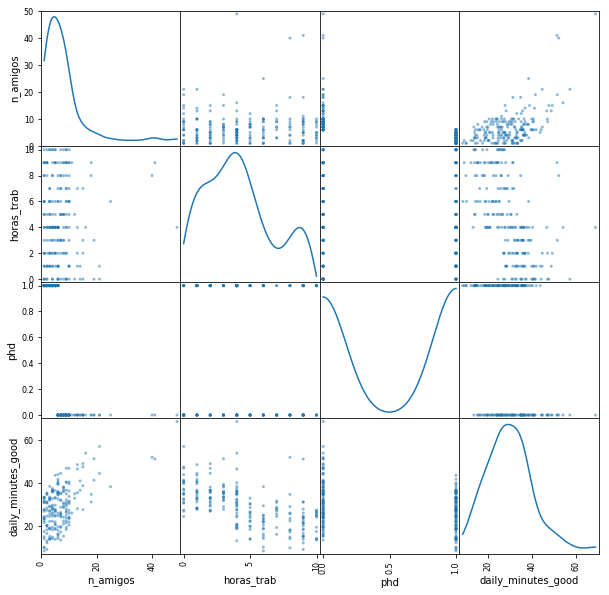

In [31]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['n_amigos','horas_trab', 'phd', 'daily_minutes_good']],figsize=(10,10), diagonal='kde')

# Varios Regressores

In [32]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

diabetes = datasets.load_diabetes() # load data
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

tuned_parameters = {}
model = LinearRegression()

clf = GridSearchCV(model, tuned_parameters, cv=10, return_train_score=False, scoring='r2')
clf.fit(diabetes.data, diabetes.target)

pd.DataFrame( clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012561,0.036489,0.000163,0.000023,{},0.556144,0.230561,0.353578,0.621905,0.265876,0.618193,0.418159,0.435152,0.43437,0.685685,0.461652,0.147135,1
